# Ejemplos de optimizadores globales

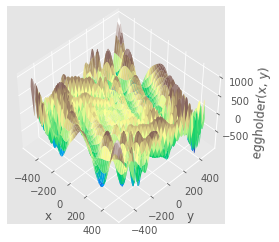



optimize.shgo
     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])


optimize.dual_annealing
     fun: -888.9491252681554
 message: ['Maximum number of iteration reached']
    nfev: 4052
    nhev: 0
     nit: 1000
    njev: 17
  status: 0
 success: True
       x: array([347.32706732, 499.41548594])


optimize.differential_evolution
     fun: -935.3379515572284
     jac: array([ 0.00000000e+00, -1.13686748e-05])
 message: 'Optimization terminated successfully.'
    nfev: 741
     nit: 23
 success: True
       x: array([439.48086188, 453.97730888])


optimize.basinhopping
                        fun: -565.9977809710114
 lowest_optimization_result:       fun: -565.9977809710114
 hess_inv: array([[ 9.38880152, -2.82742019,  0.        ,  0.        ],
       [-2.

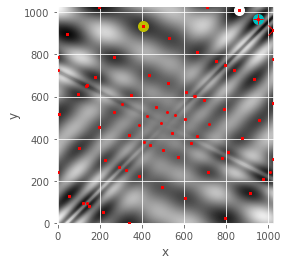

In [1]:
# Código base tomado de:
# https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import optimize

# Estilo del gráfico, existe classic
plt.style.use('ggplot')

def eggholder(x):
     return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47)))) \
             -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

print("\n\n=============================")
print("optimize.shgo")
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
print( results['shgo'] )

print("\n\n=============================")
print("optimize.dual_annealing")
results['DA'] = optimize.dual_annealing(eggholder, bounds)
print( results['DA'] )

print("\n\n=============================")
print("optimize.differential_evolution")
results['DE'] = optimize.differential_evolution(eggholder, bounds)
print(results['DE'])

print("\n\n=============================")
print("optimize.basinhopping")
results['BH'] = optimize.basinhopping(eggholder, bounds)
print(results['BH'])

print("\n\n=============================")
print("optimize.shgo - sampling_method=sobol")
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5, 
                                       sampling_method='sobol')
print(results['shgo_sobol'])

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
                cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')


def plot_point(res, marker='o', color=None):
     ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
     ax.plot(512 + results['shgo_sobol'].xl[i, 0],
             512 + results['shgo_sobol'].xl[i, 1],
             'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])

plt.show()